In [1]:
from glob import iglob
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
for file in iglob('Health-Tweets/*.txt'):
    print(file)

Health-Tweets/bbchealth.txt
Health-Tweets/cbchealth.txt
Health-Tweets/cnnhealth.txt
Health-Tweets/everydayhealth.txt
Health-Tweets/foxnewshealth.txt
Health-Tweets/gdnhealthcare.txt
Health-Tweets/goodhealth.txt
Health-Tweets/KaiserHealthNews.txt
Health-Tweets/latimeshealth.txt
Health-Tweets/msnhealthnews.txt
Health-Tweets/NBChealth.txt
Health-Tweets/nprhealth.txt
Health-Tweets/nytimeshealth.txt
Health-Tweets/reuters_health.txt
Health-Tweets/usnewshealth.txt
Health-Tweets/wsjhealth.txt


In [3]:
dfl =[]

In [4]:
dfl.append(pd.read_csv('Health-Tweets/bbchealth.txt',
          sep='|',
          header=None,
          error_bad_lines=False, encoding='latin-1'))
dfl.append(pd.read_csv('Health-Tweets/cnnhealth.txt',
          sep='|',
          header=None,
          error_bad_lines=False, encoding='latin-1'))

b'Skipping line 1422: expected 3 fields, saw 4\nSkipping line 1461: expected 3 fields, saw 4\nSkipping line 1468: expected 3 fields, saw 4\nSkipping line 1507: expected 3 fields, saw 4\nSkipping line 1547: expected 3 fields, saw 4\nSkipping line 1728: expected 3 fields, saw 4\nSkipping line 1738: expected 3 fields, saw 4\nSkipping line 1742: expected 3 fields, saw 4\nSkipping line 1847: expected 3 fields, saw 5\nSkipping line 2082: expected 3 fields, saw 4\nSkipping line 2125: expected 3 fields, saw 4\nSkipping line 3860: expected 3 fields, saw 4\n'


In [5]:
df = pd.concat(dfl)
df.columns=['id','date','tweet']

In [6]:
df[0:20]

,id,date,tweet
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...
5,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....
6,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d..."
7,585701601131765761,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care ...
8,585620828110397440,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/...
9,585437294120677376,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http:...


In [7]:
tweet=df.iloc[:,2]#Selecting the last column that has text.

In [8]:
tweet[0:20]

0     Breast cancer risk test devised http://bbc.in/...
1     GP workload harming care - BMA poll http://bbc...
2     Short people's 'heart risk greater' http://bbc...
3     New approach against HIV 'promising' http://bb...
4     Coalition 'undermined NHS' - doctors http://bb...
5     Review of case against NHS manager http://bbc....
6     VIDEO: 'All day is empty, what am I going to d...
7     VIDEO: 'Overhaul needed' for end-of-life care ...
8     Care for dying 'needs overhaul' http://bbc.in/...
9     VIDEO: NHS: Labour and Tory key policies http:...
10    Have GP services got worse? http://bbc.in/1Ci5c22
11    A&amp;E waiting hits new worst level http://bb...
12    Parties row over GP opening hours http://bbc.i...
13    Why strenuous runs may not be so bad after all...
14    VIDEO: Health surcharge for non-EU patients ht...
15    VIDEO: Skin cancer spike 'from 60s holidays' h...
16    80,000 'might die' in future outbreak http://b...
17    Skin cancer 'linked to holiday boom' http:

In [9]:
stopwords = nltk.corpus.stopwords.words('english')

In [10]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [11]:
type(tweet)
dfss = tweet.to_string()

In [12]:
words = re.sub(r'http\S+', '', dfss)
words = words.lower()
words = words.split()
print(words)

['0', 'breast', 'cancer', 'risk', 'test', 'devised', '1', 'gp', 'workload', 'harming', 'care', '-', 'bma', 'poll', '2', 'short', "people's", "'heart", 'risk', "greater'", '3', 'new', 'approach', 'against', 'hiv', "'promising'", '4', 'coalition', "'undermined", "nhs'", '-', 'doctors', '5', 'review', 'of', 'case', 'against', 'nhs', 'manager', '6', 'video:', "'all", 'day', 'is', 'empty,', 'what', 'am', 'i', 'going', 'to', 'd...', '7', 'video:', "'overhaul", "needed'", 'for', 'end-of-life', 'care', '...', '8', 'care', 'for', 'dying', "'needs", "overhaul'", '9', 'video:', 'nhs:', 'labour', 'and', 'tory', 'key', 'policies', '10', 'have', 'gp', 'services', 'got', 'worse?', '11', 'a&amp;e', 'waiting', 'hits', 'new', 'worst', 'level', '12', 'parties', 'row', 'over', 'gp', 'opening', 'hours', '13', 'why', 'strenuous', 'runs', 'may', 'not', 'be', 'so', 'bad', 'after', 'all...', '14', 'video:', 'health', 'surcharge', 'for', 'non-eu', 'patients', 'ht...', '15', 'video:', 'skin', 'cancer', 'spike', 

In [13]:
#from sklearn.feature_extraction import CountVectorizer feature
from sklearn.feature_extraction.text import CountVectorizer
#extracting features from train files
vecto = CountVectorizer()
X = vecto.fit_transform(tweet) #sparse matrix structure of text data turned into numeric
X.shape #shape of the sparse matrix

(7974, 17231)

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape ) 

(7974, 17231)


In [15]:
from sklearn.cluster import KMeans

num_clusters =10 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

In [16]:
# Number of clusters
kmeans = KMeans(n_clusters=10, random_state=42)
# Fitting the input data
kmeans = kmeans.fit(tfidf)
# Getting the cluster labels
labels = kmeans.predict(tfidf)
# Centroid values
centroids = kmeans.cluster_centers_

In [17]:
# Comparing with scikit-learn centroids
#print(C) # From Scratch
print(centroids) # From sci-kit learn

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00047856 0.         ... 0.         0.00058562 0.        ]
 [0.         0.00208779 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00774677 0.         ... 0.         0.         0.        ]
 [0.         0.00106844 0.         ... 0.00023409 0.         0.        ]
 [0.         0.00151668 0.         ... 0.         0.         0.00045447]]


In [18]:
print(labels)

[7 5 5 ... 8 8 7]


In [19]:
print(tfidf)

  (0, 1166)	0.5633045896958723
  (0, 6024)	0.09635596448640638
  (0, 6501)	0.3313647181662834
  (0, 6811)	0.22981116237273058
  (0, 8008)	0.5633045896958723
  (0, 10049)	0.059705967611921845
  (0, 10242)	0.08816347689900729
  (0, 14037)	0.28097662204480256
  (0, 15549)	0.3212323090901554
  (1, 1156)	0.45316002715697357
  (1, 6024)	0.07751520630600722
  (1, 6326)	0.3902376644233261
  (1, 6848)	0.20753141795895533
  (1, 9504)	0.2721044677057414
  (1, 9708)	0.4216988457901498
  (1, 10049)	0.04803148846889317
  (1, 10242)	0.0709246193207435
  (1, 13118)	0.35877648305650234
  (1, 16783)	0.45316002715697357
  (2, 1155)	0.5671061276479874
  (2, 6024)	0.09700623587174251
  (2, 9541)	0.4565748744056391
  (2, 9795)	0.2937652604497993
  (2, 10049)	0.060108901488187656
  (2, 10242)	0.08875846016304026
  :	:
  (7971, 12006)	0.32332284172579956
  (7971, 14104)	0.39484233206094427
  (7971, 15435)	0.32045490745938093
  (7971, 16729)	0.1828447580908665
  (7972, 5743)	0.1189342226811456
  (7972, 7230)	0

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters=10, random_state=42, n_jobs=-1)

In [22]:
model.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [23]:
wss = []
for n in range(2, 10):
    print(n)
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(tfidf)
    wss.append(-model.score(tfidf))

2
3
4
5
6
7
8
9


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

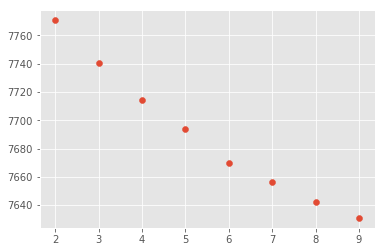

In [25]:
plt.scatter(range(2, 10), wss)

In [26]:
np.diff(wss)

array([-29.91161949, -26.2386213 , -20.74496106, -23.70167921,
       -14.05637653, -13.6594634 , -11.45024992])

In [27]:
wss

[7770.750248147128,
 7740.838628653064,
 7714.600007354659,
 7693.85504629179,
 7670.15336708515,
 7656.096990552304,
 7642.43752715381,
 7630.987277233629]

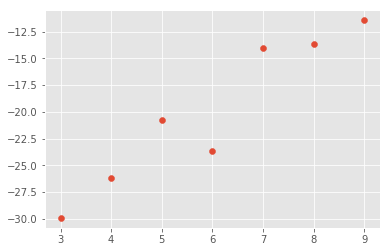

In [28]:
plt.scatter(range(3, 10), np.diff(wss))

In [29]:
model = KMeans(n_clusters=10, random_state=42, n_jobs=-1)

In [30]:
model.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [31]:
cluster_labels = model.predict(tfidf)

In [32]:
cluster_labels

array([6, 6, 6, ..., 5, 5, 5], dtype=int32)

In [33]:
print(tfidf)

  (0, 1166)	0.5633045896958723
  (0, 6024)	0.09635596448640638
  (0, 6501)	0.3313647181662834
  (0, 6811)	0.22981116237273058
  (0, 8008)	0.5633045896958723
  (0, 10049)	0.059705967611921845
  (0, 10242)	0.08816347689900729
  (0, 14037)	0.28097662204480256
  (0, 15549)	0.3212323090901554
  (1, 1156)	0.45316002715697357
  (1, 6024)	0.07751520630600722
  (1, 6326)	0.3902376644233261
  (1, 6848)	0.20753141795895533
  (1, 9504)	0.2721044677057414
  (1, 9708)	0.4216988457901498
  (1, 10049)	0.04803148846889317
  (1, 10242)	0.0709246193207435
  (1, 13118)	0.35877648305650234
  (1, 16783)	0.45316002715697357
  (2, 1155)	0.5671061276479874
  (2, 6024)	0.09700623587174251
  (2, 9541)	0.4565748744056391
  (2, 9795)	0.2937652604497993
  (2, 10049)	0.060108901488187656
  (2, 10242)	0.08875846016304026
  :	:
  (7971, 12006)	0.32332284172579956
  (7971, 14104)	0.39484233206094427
  (7971, 15435)	0.32045490745938093
  (7971, 16729)	0.1828447580908665
  (7972, 5743)	0.1189342226811456
  (7972, 7230)	0

In [34]:
df_tr = pd.DataFrame(tfidf.toarray())

In [35]:
df_tr['clusters'] = labels

In [36]:
df_tr[0:20]

,0,1,2,3,4,5,6,7,8,9,...,17222,17223,17224,17225,17226,17227,17228,17229,17230,clusters
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [37]:
type(df_tr)

pandas.core.frame.DataFrame

In [38]:
df_tr.describe()

,0,1,2,3,4,5,6,7,8,9,...,17222,17223,17224,17225,17226,17227,17228,17229,17230,clusters
count,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,...,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000
mean,0.000053,0.001608,0.000045,0.000055,0.000075,0.000059,0.000977,0.000054,0.001582,0.001959,...,0.000065,0.000092,0.000038,0.000039,0.000067,0.000051,0.000046,0.000027,0.000044,5.341736
std,0.004716,0.021399,0.004034,0.004892,0.006655,0.005250,0.013675,0.004816,0.017247,0.018123,...,0.005813,0.005831,0.003425,0.003439,0.005951,0.004570,0.004137,0.002420,0.003914,2.490614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,0.421102,0.375703,0.360239,0.436842,0.594248,0.468774,0.237796,0.430036,0.378374,0.310650,...,0.519070,0.370764,0.305862,0.307082,0.531364,0.408056,0.369391,0.216095,0.349490,9.000000


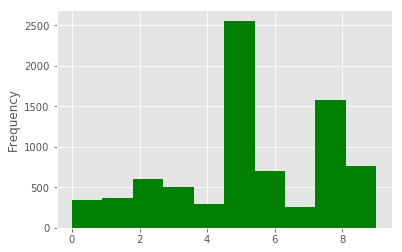

In [39]:
df_tr['clusters'].plot(kind='hist', color="green")


In [40]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
silh = metrics.silhouette_score(df_tr, labels, metric='euclidean')
calin = metrics.calinski_harabaz_score(df_tr, labels)  
print(silh, calin)

0.1954426869606671 5765.278632911228


In [41]:
np.bincount(labels)

array([ 340,  369,  606,  502,  297, 2558,  700,  255, 1578,  769])

In [42]:
# maybe get top words for these clusters
cluster_tweets9 = np.array(tweet)[labels == 9]
cluster_tweets9

array(['Ebola: Why is it this disease we fear ? http://bbc.in/1r4bZbA',
       "Gout: Why I don't find it funny at all http://bbc.in/1cZoYID",
       'Is it safe to drink cocktails with raw egg? http://bbc.in/1bpygd2',
       "It doesn't take much to damage your hearing at a sports bar or nightclub. That's why a billion people are at risk. http://cnn.it/1BOphBk",
       'RT @CNN: Forever young? Discover this islandâ\x80\x99s secrets to longevity on #TheWonderList w/ @BillWeirCNN  http://cnn.it/1GNdmqc https://t.co/â\x80¦',
       'RT @CNN: Is post-traumatic stress disorder in your genes? A simple blood test may one day help tell you http://cnn.it/1xls8w5 http://t.co/â\x80¦',
       'RT @CNNOpinion: Women can defeat #Alzheimers, says @mariashriver. #WipeOutAlz challenge will make it happen. http://cnn.it/1AklXJQ http://â\x80¦',
       'CDC: Misuse of garments may have led to release of bioterror bacteria at Tulane monkey lab. http://cnn.it/18HDKDg',
       'RT @CNN: A plant-based diet t

In [43]:
clust_wordcount9 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster_tweets9)))

In [44]:
# get the top 10 words from this cluster
clust_wordcount9.most_common(50)

[(':', 1080),
 ('http', 758),
 ('@', 524),
 ('#', 510),
 ('to', 335),
 ('.', 291),
 ('?', 238),
 ('you', 231),
 (',', 208),
 ('a', 192),
 ('it', 149),
 ('your', 147),
 ("'s", 136),
 ('in', 129),
 ('of', 107),
 ('for', 104),
 ('is', 89),
 ('and', 88),
 ('RT', 83),
 ('this', 80),
 ('the', 76),
 ('have', 69),
 ('!', 66),
 ('are', 64),
 ('via', 64),
 ('may', 57),
 ('be', 54),
 ('--', 52),
 ('says', 51),
 ('at', 46),
 ("n't", 45),
 ('on', 44),
 ('health', 43),
 ('from', 43),
 ('not', 42),
 ('with', 41),
 ('about', 40),
 ('Ebola', 38),
 ('CNN', 38),
 ('can', 38),
 (';', 38),
 ('``', 38),
 ('that', 37),
 ("''", 37),
 ('do', 36),
 ('It', 36),
 ('life', 36),
 ('know', 36),
 ('new', 36),
 ('&', 34)]

In [63]:
def clean_text(self,):
    words = re.sub(r'http\S+', '', dfss)
    words = words.lower()
    words = words.split()
    return words


In [66]:
clean1 = clean_text(dfss)

In [67]:
print(clean1)

['0', 'breast', 'cancer', 'risk', 'test', 'devised', '1', 'gp', 'workload', 'harming', 'care', '-', 'bma', 'poll', '2', 'short', "people's", "'heart", 'risk', "greater'", '3', 'new', 'approach', 'against', 'hiv', "'promising'", '4', 'coalition', "'undermined", "nhs'", '-', 'doctors', '5', 'review', 'of', 'case', 'against', 'nhs', 'manager', '6', 'video:', "'all", 'day', 'is', 'empty,', 'what', 'am', 'i', 'going', 'to', 'd...', '7', 'video:', "'overhaul", "needed'", 'for', 'end-of-life', 'care', '...', '8', 'care', 'for', 'dying', "'needs", "overhaul'", '9', 'video:', 'nhs:', 'labour', 'and', 'tory', 'key', 'policies', '10', 'have', 'gp', 'services', 'got', 'worse?', '11', 'a&amp;e', 'waiting', 'hits', 'new', 'worst', 'level', '12', 'parties', 'row', 'over', 'gp', 'opening', 'hours', '13', 'why', 'strenuous', 'runs', 'may', 'not', 'be', 'so', 'bad', 'after', 'all...', '14', 'video:', 'health', 'surcharge', 'for', 'non-eu', 'patients', 'ht...', '15', 'video:', 'skin', 'cancer', 'spike', 